# Rayleigh-Sommerfeld (RS)
According to Rayleigh-Sommerfeld approach, the field at a plane z from the mask, can be computed as

$$E(\mathbf{r},t)=ike^{-i\omega t}\iint E_{0}(\xi,\eta)cos\theta\frac{e^{ikR}}{R}d\xi d\eta,$$

where $\mathbf{r}=(x, y, z)$,  $R=\sqrt{(\xi-x)^{2}+(\eta-y)^{2}+{z}^{2}}$, and $cos\theta=z/R.$

This integral can be computed as a convolution,

$$E(x,y,z)=E_{0}(\xi,\eta)*h(\xi,\eta;z),$$

where the convolution kernel is

$$h(\xi,\eta;z)=-\frac{1}{2\pi}\frac{z}{R}\left(ik-\frac{1}{R}\right)\frac{e^{ikR}}{R},$$

with  $R=\sqrt{\xi^{2}+\eta^{2}+{z}^{2}}.$


In Diffractio, we have used the algorithm described in:

**Shen, F. & Wang, A. Fast-Fourier-transform based numerical integration method for the Rayleigh-Sommerfeld diffraction formula. Appl. Opt. 45, 1102–1110 (2006).**

The algorithm can be applied to X, and XY schemes, and also in the propagated schemes: XZ and XYZ.

The main characteristics of the algorithm are:
- Propagation ocurrs between two parallel planes, whose distance between them is z. The results are more accurate when de distance between de planes increases. The function to perform Rayleigh-Sommerfeld approach is RS. There is a parameter which stores the quality parameter (self.quality). Also, it can be seen when invoquing to RS function. The parameter verbose, when it is True, shows the quality parameter.


- The algorithm is programmed using two FFT and one IFFT. The size of the matrices is 2N x 2N, where N is the number of data involved in the analysis.
- There is a quality parameter, described in self.quality, which allows us to determine whether the results is acceptable (quality parameter >1).
- The size of the output matrices is equal to that of the input matrices. Nevertheless, higher size of the output fields can be obtained as the output field can be displaced from the center. This is programmed with parameter amplification, which size the amplification of the output field with respect to the input field. The computation time is proportional to the amplification.
- The X and XZ schemes are accurate when the fields and masks are simmetrycal with respect to Z axis. That means that the lens in the X and XZ shcemes is a cylindrical lens.


Now, let us show an example of usage of Rayleigh-Sommerfeld approach for the differente schemes:

In [1]:
from diffractio import np, mm, degrees, um

## X scheme

In [2]:
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X

Good result: factor 33.64


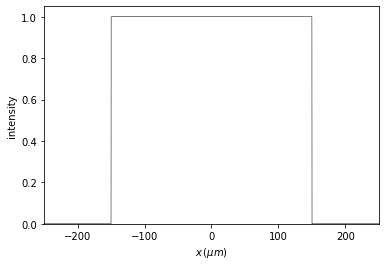

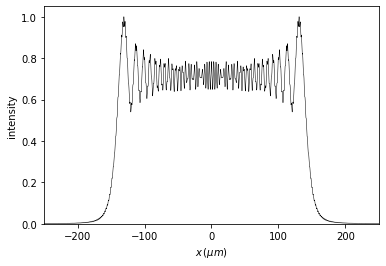

In [3]:
wavelength = 0.5 * um
x0 = np.linspace(-0.25 * mm, 0.25 * mm, 1024 * 16)

u0 = Scalar_source_X(x=x0, wavelength=wavelength, info="u0")
u0.plane_wave(A=1)
t0 = Scalar_mask_X(x=x0, wavelength=wavelength, info="t0")
t0.slit(x0=0, size=300 * um)
t0.draw(kind="intensity")

u1 = t0 * u0

t2 = u1.RS(z=1 * mm, verbose=True)
t2.normalize()
t2.draw(kind="intensity")

In [4]:
print("quality = {}".format(t2.quality))

quality = [33.64442563]


### Bad quality parameter

When the quality parameter is < 1, then the field computed using the RS algorithm produces bad results:

- Needs denser sampling: factor 0.13


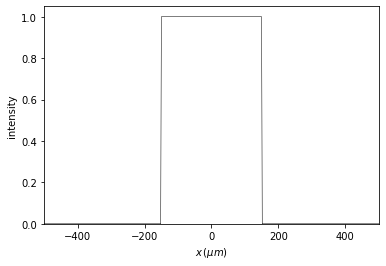

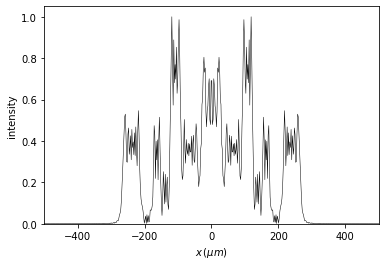

In [5]:
wavelength = 0.5 * um
x0 = np.linspace(-0.5 * mm, 0.5 * mm, 512)

u0 = Scalar_source_X(x=x0, wavelength=wavelength, info="u0")
u0.plane_wave(A=1)
t0 = Scalar_mask_X(x=x0, wavelength=wavelength, info="t0")
t0.slit(x0=0, size=300 * um)
t0.draw(kind="intensity")

u1 = t0 * u0

t2 = u1.RS(z=0.1 * mm, verbose=True)
t2.normalize()
t2.draw(kind="intensity")

### Amplification of the field

The Rayleigh-Sommefeld implementation allows an amplification of the field since, sometimes, light diverges. Processing time increases approximately linearly with amplification number.

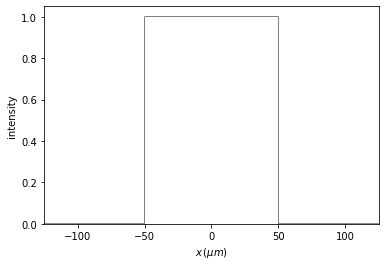

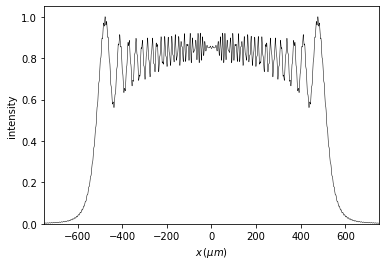

In [6]:
wavelength = 0.5 * um
x0 = np.linspace(-0.125 * mm, 0.125 * mm, 1024 * 16)

u0 = Scalar_source_X(x=x0, wavelength=wavelength, info="u0")
u0.spherical_wave(A=1, x0=0 * um, z0=-0.1 * mm)
t0 = Scalar_mask_X(x=x0, wavelength=wavelength, info="t0")
t0.slit(x0=0, size=100 * um)
t0.draw(kind="intensity")

u1 = t0 * u0

u2 = u1.RS(z=1 * mm, amplification=6, verbose=False)
u2.normalize()
u2.draw(kind="intensity")

## XZ scheme

In [7]:
from diffractio.scalar_fields_X import Scalar_field_X
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ

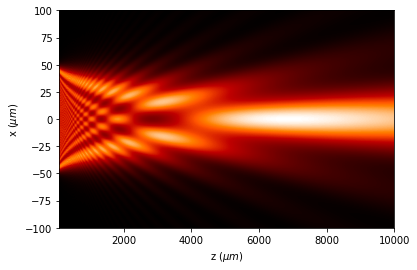

In [8]:
wavelength = 0.5 * um
x0 = np.linspace(-100 * um, 100 * um, 1024)
z0 = np.linspace(100 * um, 10 * mm, 512)

u0 = Scalar_source_X(x=x0, wavelength=wavelength, info="u0")
u0.plane_wave(A=1)
t0 = Scalar_mask_X(x=x0, wavelength=wavelength, info="t0")
t0.slit(x0=0, size=100 * um)

u1 = t0 * u0

uz = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, info="t0")
uz.incident_field(u1)

uz.RS(verbose=True)
uz.draw(kind="intensity")

## XY scheme

In [9]:
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY

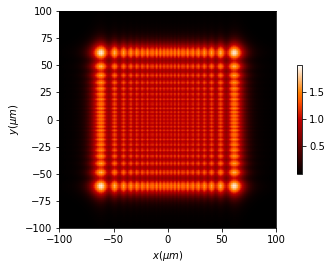

In [10]:
wavelength = 0.5 * um
x0 = np.linspace(-100 * um, 100 * um, 1024)
y0 = np.linspace(-100 * um, 100 * um, 1024)

u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength, info="u0")
u0.plane_wave(A=1)

t0 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength, info="t0")
t0.square(r0=(0 * um, 0 * um), size=150 * um, angle=0 * degrees)

u1 = t0 * u0

u2 = u1.RS(z=500 * um)

u2.draw(kind="intensity", has_colorbar="vertical")

## XYZ Scheme

We perform the XYZ field distribution by a for loop. Then the computing time and the storing size is proportional to the number of z planes used in the z parameter.

In [11]:
from diffractio.scalar_fields_XYZ import Scalar_field_XYZ

In [12]:
wavelength = 0.5 * um
x0 = np.linspace(-100 * um, 100 * um, 256)
y0 = np.linspace(-100 * um, 100 * um, 256)
z0 = np.linspace(500 * um, 2 * mm, 64)

u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength, info="u0")
u0.plane_wave(A=1)

t0 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength, info="t0")
t0.square(r0=(0 * um, 0 * um), size=150 * um, angle=0 * degrees)

u1 = t0 * u0

uz = Scalar_field_XYZ(x=x0, y=y0, z=z0, wavelength=wavelength)
uz.incident_field(u1)
uz.RS(verbose=True)

time in RS= 5.383280992507935. num proc= 1


<Figure size 432x288 with 0 Axes>

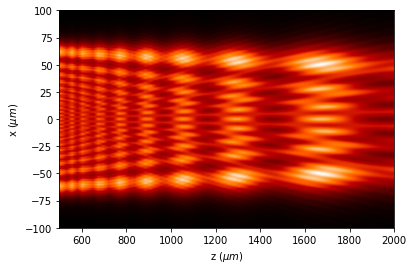

In [13]:
uz.draw_XZ(kind="intensity")